# Satni podaci - gas

Sa platforme ENTSOG pronađeni su podaci za transport gasa iz Bugarske u Srbiju samo za 2021. godinu. Srbija posjeduje domaća nalazišta gasa, od kojih su najveća u Vojvodini, ali se uglavnom oslanja na uvoz gasa iz Rusije. Transport prirodnog gasa obavljaju "Transportgas Srbija" d.o.o. i "Jugorosgaz-Transport" d.o.o. Tranzit prirodnog gasa za potrebe Bosne i Hercegovine, obavlja se u okviru "Transportgas Srbija" d.o.o. 
Potrošnja gasa u Srbiji iznosi oko 2100 mil.m3 godišnje, od čega se oko 15% obezbjeđuje iz domaće proizvodnje. Donja toplotna moć gasa iznosi Hd = 33338 $\frac{kJ} {m^{3}}$, odnosno Hd =9.2 $\frac{kWh} {m^{3}}$
Ova država je izabrana za analizu jer prirodni gas iz Srbije dolazi do  Zvornika, na ulazu u BiH. Prethodno, predueće BH-Gas d.o.o. nije ustupilo podatke.  S obzirom da za tu tačku podaci transporta gasa nisu dostupni, ideja je da se podaci koji su dobiveni iz Srbije skaliraju prema godišnjoj potrošnji prirodnog gasa u BiH. Osim transportne tačke sa Bugarskom, tu je i transportna tačka sa Mađarskom, ali tu ne postoje podaci o eventualnom transportu gasa u Mađarsku 
Stranica sa koje su preuzeti podaci je na linku:
https://transparency.entsog.eu/#/points/data?points=hu-tso-0001itp-10013exit%2Crs-tso-0003itp-10013entry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
file=pd.read_excel(r"FILES\GAS\export_operationaldata_2022_03_06_104709.xlsx",header=0,parse_dates=True)

U navedenom fajlu podaci započinju da se bilježe od 6. sata 1.1.2021. godine.

In [3]:
file.head(2)

,indicator,periodType,periodFrom,periodTo,tsoEicCode,operatorLabel,pointLabel,tsoItemIdentifier,directionKey,unit,...,generalRemarks,value,lastUpdateDateTime,isUnlimited,flowStatus,isCamRelevant,isNA,isCmpRelevant,interruptionCalculationRemark,isArchived
0,Physical Flow,hour,2021-01-01 06:00,2021-01-01 07:00,21X-BG-A-A0A0A-C,Bulgartransgaz,Kireevo (BG) / Zaychar (RS),58Z-000000007-KZ,exit,kWh/h,...,NaN,3060552,2021-01-10 07:25,NaN,Confirmed,no,NaN,no,NaN,0
1,Physical Flow,hour,2021-01-01 07:00,2021-01-01 08:00,21X-BG-A-A0A0A-C,Bulgartransgaz,Kireevo (BG) / Zaychar (RS),58Z-000000007-KZ,exit,kWh/h,...,NaN,5412085,2021-01-10 07:25,NaN,Confirmed,no,NaN,no,NaN,0


In [4]:
file["Hour"]=pd.to_datetime(file["periodFrom"]).dt.hour
file["Month"]=pd.to_datetime(file["periodFrom"]).dt.month
file["Year"]=pd.to_datetime(file["periodFrom"]).dt.year

Izbacivanje nepotrebnih kolona:

In [5]:
file=file.drop(['generalRemarks','lastUpdateDateTime',
       'isUnlimited', 'flowStatus', 'isCamRelevant', 'isNA', 'isCmpRelevant',
       'interruptionCalculationRemark', 'isArchived',"itemRemarks"],axis=1)

In [6]:
file.columns

Index(['indicator', 'periodType', 'periodFrom', 'periodTo', 'tsoEicCode',
       'operatorLabel', 'pointLabel', 'tsoItemIdentifier', 'directionKey',
       'unit', 'value', 'Hour', 'Month', 'Year'],
      dtype='object')

In [7]:
file.head(3) 

,indicator,periodType,periodFrom,periodTo,tsoEicCode,operatorLabel,pointLabel,tsoItemIdentifier,directionKey,unit,value,Hour,Month,Year
0,Physical Flow,hour,2021-01-01 06:00,2021-01-01 07:00,21X-BG-A-A0A0A-C,Bulgartransgaz,Kireevo (BG) / Zaychar (RS),58Z-000000007-KZ,exit,kWh/h,3060552,6,1,2021
1,Physical Flow,hour,2021-01-01 07:00,2021-01-01 08:00,21X-BG-A-A0A0A-C,Bulgartransgaz,Kireevo (BG) / Zaychar (RS),58Z-000000007-KZ,exit,kWh/h,5412085,7,1,2021
2,Physical Flow,hour,2021-01-01 08:00,2021-01-01 09:00,21X-BG-A-A0A0A-C,Bulgartransgaz,Kireevo (BG) / Zaychar (RS),58Z-000000007-KZ,exit,kWh/h,8996848,8,1,2021


Najveći uvoz plina je zabilježen u zimskim mjesecima, i to u zadnja 3 mjeseca 2021. godine, dok je u prva 3 mjeseca 2021. bio nešto manji. Ovdje bi utjecaj mogla imati temperatura zraka, odnosno moguće da su klimatski uslovi bili povoljniji na početku godine.

Text(0.5, 1.0, 'Mjesečni uvoz')

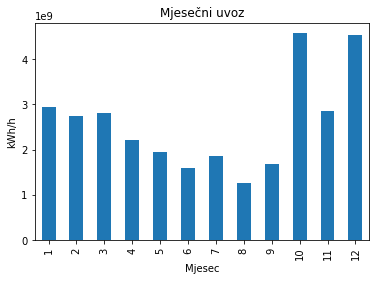

In [8]:
file.groupby("Month")["value"].sum().plot(kind="bar")
plt.xlabel("Mjesec")
plt.ylabel("kWh/h")
plt.title("Mjesečni uvoz")

Srednji uvoz po satima - Mjesec 2021


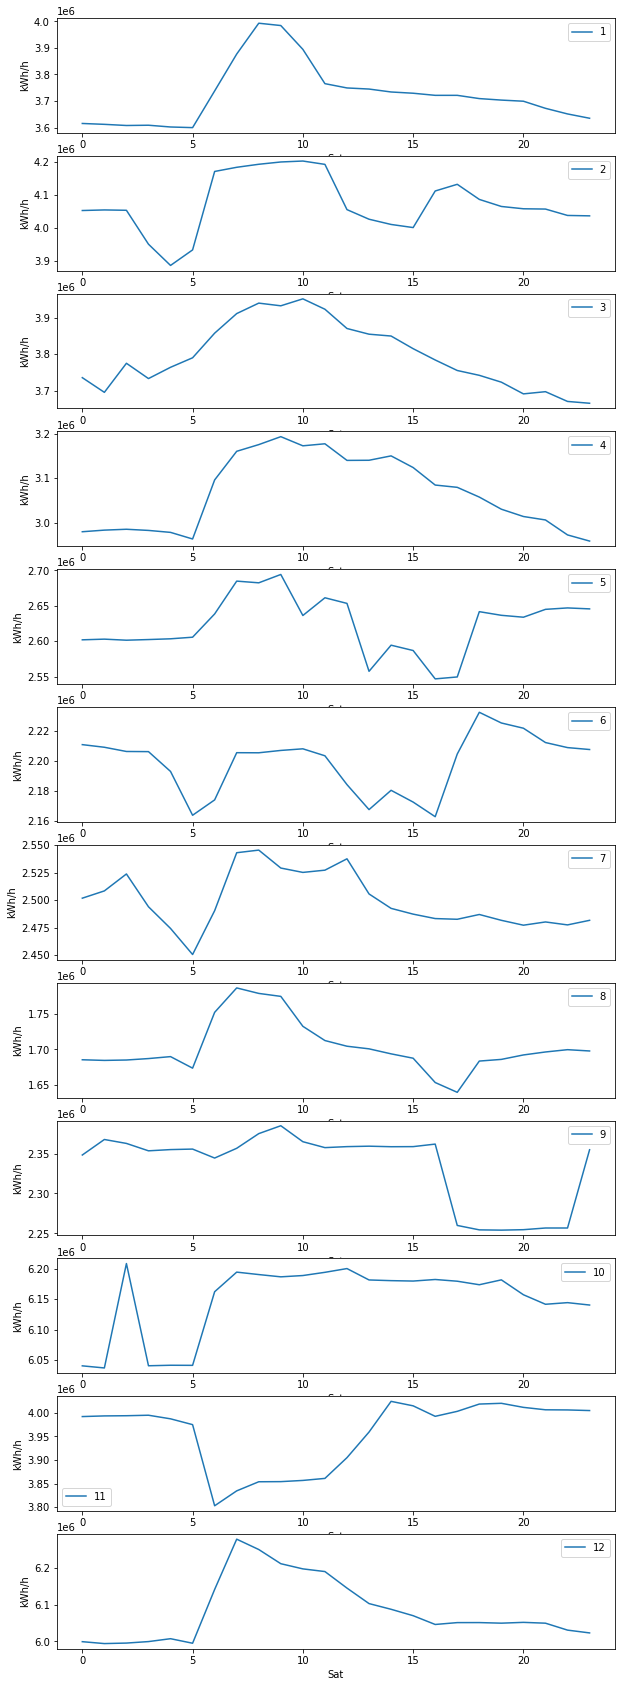

In [9]:
fig,ax=plt.subplots(len(file["Month"].unique()),figsize=(10,30))
print("Srednji uvoz po satima - Mjesec 2021")
for k,month in enumerate(file["Month"].unique()):
    file[(file["Month"]==month)&(file["Year"]==2021)].groupby("Hour")["value"].mean().plot(ax=ax[k],label=k+1)
    ax[k].set_xlabel("Sat")
    ax[k].set_ylabel("kWh/h")
    ax[k].legend()

Pretvaranje u m3 i Sm3:

In [10]:
file["value, m3"]=file["value"]/9.2606
file["value, Sm3"]=file["value, m3"]* 0.9681 * 2.3817



In [11]:
file[["value","value, m3","value, Sm3"]].describe()

,value,"value, m3","value, Sm3"
count,8.784000e+03,8.784000e+03,8.784000e+03
mean,3.531045e+06,3.812977e+05,8.791671e+05
std,1.636027e+06,1.766654e+05,4.073415e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.759900e+06,2.980260e+05,6.871657e+05
50%,3.206568e+06,3.462592e+05,7.983780e+05
75%,4.133992e+06,4.464065e+05,1.029290e+06
max,1.152200e+07,1.244195e+06,2.868771e+06


Na dijagramima će se prikazati vrijednosti uvoza tokom godine u različitim jedinicama.

(Text(0.5, 0, 'Sat'), Text(0.5, 0, 'Sat'), Text(0.5, 0, 'Sat'))

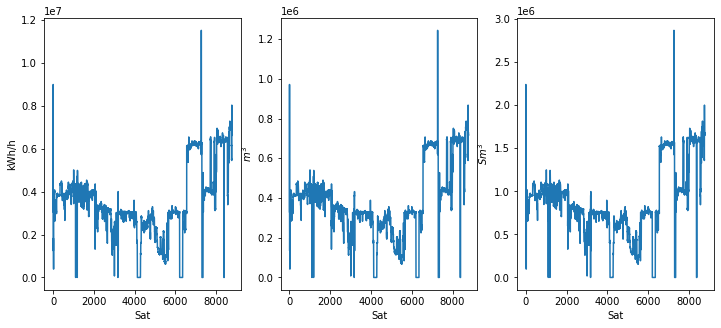

In [12]:
fig,ax=plt.subplots(ncols=3,figsize=(12,5))
file["value"].plot(ax=ax[0])
file["value, m3"].plot(ax=ax[1])
file["value, Sm3"].plot(ax=ax[2])
ax[0].set_ylabel("kWh/h")
ax[1].set_ylabel("$m^3$")
ax[2].set_ylabel("$Sm^3$")
ax[0].set_xlabel("Sat"),ax[1].set_xlabel("Sat"),ax[2].set_xlabel("Sat")

Na stranici Agencije za statistiku BiH još uvijek nisu poznati podaci o potrošnji plina za 2021., te će se u ovom slučaju iskoristiti količina potrošenog plina u 2020., jer se BiH u potpunosti oslanja na uvoz prirodnog gasa. Sada će se izračunati normalizirane vrijednosti trenutne količine naspram ukupne uvozne količine u 2021. godini.

In [13]:
#potrosnja plina u bih 2020. (podaci za 2021. jos nisu dostupni)
#213 379*1000
scaled_columns=["value, kW/kWh","value, m3/m3","value,Sm3/Sm3"]
values=["value","value, m3","value, Sm3"]
file=file.assign(**dict([(_,None) for _ in scaled_columns]))
sum_year=file[file["Year"]==2021][values].astype(float).sum(axis=0)
file.loc[file["Year"]==2021,scaled_columns]=(file[file["Year"]==2021][values].div(sum_year)).astype(float).values


Prethodno je navedeno da su potrebe prirodnog gasa u Srbiji (2100 - 2400) mil. u 2021. $m^3$, dok izračunata suma uvozne količine za 2021. godinu  iznosi 3327,3 mil. $m^3$. Ovdje svakako određena količina gasa ide prema BiH, a moguće je da postoji i transfer prirodnog gasa u i iz Mađarske, te da se također određena količina ostavlja u rezervama.

In [14]:
sum_year/1000000

value         30812.534413
value, m3      3327.271928
value, Sm3     7671.769973
dtype: float64

In [15]:
B_H_sm3=213379*1000
B_H_m3=213379*1000/(0.9681 * 2.3817)
B_H_kW=(213379*1000/(0.9681 * 2.3817))*9.9

Dobijeni normalizirani omjer će se pomnožiti sa potrošnjom gasa u BiH za 2020. kako bi se dobile trenutne satne vrijednosti u periodu od 1.1.2021. do 31.12.2021.

In [16]:
BH_FILE=file.loc[file["Year"]==2021,scaled_columns+["Hour"]]
BH_FILE["value, kW"]=BH_FILE["value, kW/kWh"]*B_H_kW
BH_FILE["value, m3"]=BH_FILE["value, m3/m3"]*B_H_m3
BH_FILE["value, Sm3"]=BH_FILE["value,Sm3/Sm3"]*B_H_sm3

(Text(0.5, 0, 'Sat'), Text(0.5, 0, 'Sat'), Text(0.5, 0, 'Sat'))

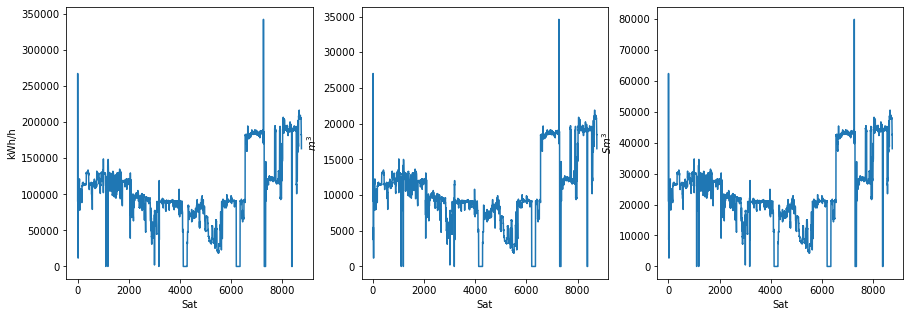

In [17]:
fig,ax=plt.subplots(ncols=3,figsize=(15,5))
BH_FILE["value, kW"].plot(ax=ax[0])
BH_FILE["value, m3"].plot(ax=ax[1])
BH_FILE["value, Sm3"].plot(ax=ax[2])

ax[0].set_ylabel("kWh/h")
ax[1].set_ylabel("$m^3$")
ax[2].set_ylabel("$Sm^3$")
ax[0].set_xlabel("Sat"),ax[1].set_xlabel("Sat"),ax[2].set_xlabel("Sat")

In [18]:
BH_FILE.shape

(8754, 7)

# Priprema fajlova za EnergyPLAN

EnergyPLAN za unos traži 8784 satni podataka, te će se zadnjih 30 satnih podataka iz BH_FILE ponovo dodati kako bi završni fajl ima0 8784 podatka.

In [19]:
GAS_BH_2021=BH_FILE["value, kW"]

In [20]:
values=BH_FILE["value, kW"].tail(30)

In [21]:
GAS_BH_2021=GAS_BH_2021.append(values, ignore_index = True)

In [22]:
GAS_BH_2021.shape

(8784,)

In [23]:
pd.to_numeric(GAS_BH_2021).to_csv(r'EnergyPLAN files\Gas\Hourly\GAS_BH_2021.txt', index=False,header=0,decimal=",",sep=" ")